## Badanie charakterystyk częstotiwościowych
*sympy -> numpy -> matplotlib*

In [10]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# wskazówki dotyczące typów zmiennych pozwalają upraszczać wyrażenia :)

t, w0 = sp.symbols('t w_0', real=True, positive=True)
s = sp.symbols('s', complex=True)
A = sp.symbols('A', real=True)

In [11]:
x_t = A * sp.sin(w0 * t) + t**3 / 3
x_t

A*sin(t*w_0) + t**3/3

In [12]:
X_s = sp.laplace_transform(x_t, t, s, noconds=True)
X_s = sp.simplify(X_s)
X_s

A*w_0/(s**2 + w_0**2) + 2/s**4

In [13]:
Y_s = 1 / (s + 1) * X_s
Y_s = sp.simplify(Y_s)
Y_s

(A*s**4*w_0 + 2*s**2 + 2*w_0**2)/(s**4*(s + 1)*(s**2 + w_0**2))

In [14]:
y_t = sp.inverse_laplace_transform(Y_s, s, t)
y_t = sp.powsimp(y_t)
y_t

-A*w_0*cos(t*w_0)/(w_0**2 + 1) + A*sin(t*w_0)/(w_0**2 + 1) + t**3/3 - t**2 + 2*t - 2 + (A*w_0 + 2*w_0**2 + 2)*exp(-t)/(w_0**2 + 1)

In [15]:
Y_s = sp.laplace_transform(y_t, t, s, noconds=True)
Y_s = sp.simplify(Y_s)
Y_s

(A*s**4*w_0 + 2*s**2 + 2*w_0**2)/(s**4*(s**3 + s**2 + s*w_0**2 + w_0**2))

In [16]:
omega = sp.symbols('omega', real=True)
Y_jw = Y_s.subs(s, 1j*omega)
Y_jw

1.0*(1.0*A*omega**4*w_0 - 2.0*omega**2 + 2*w_0**2)/(omega**4*(-1.0*I*omega**3 - 1.0*omega**2 + 1.0*I*omega*w_0**2 + w_0**2))

In [17]:
Y_jw = Y_jw.subs({A: 24.3, w0: 5.2})
Y_jw = sp.simplify(Y_jw)
Y_jw

(-126.36*omega**4 + 2.0*omega**2 - 54.08)/(omega**4*(1.0*I*omega**3 + 1.0*omega**2 - 27.04*I*omega - 27.04))

In [18]:
Y_jw_fun = sp.lambdify(omega, Y_jw, modules='numpy')

w = np.logspace(-1, 2, 1000)  # od 0.1 do 100 rad/s

Y_eval = Y_jw_fun(w)

amplitude = np.abs(Y_eval)
phase = np.angle(Y_eval, deg=True)

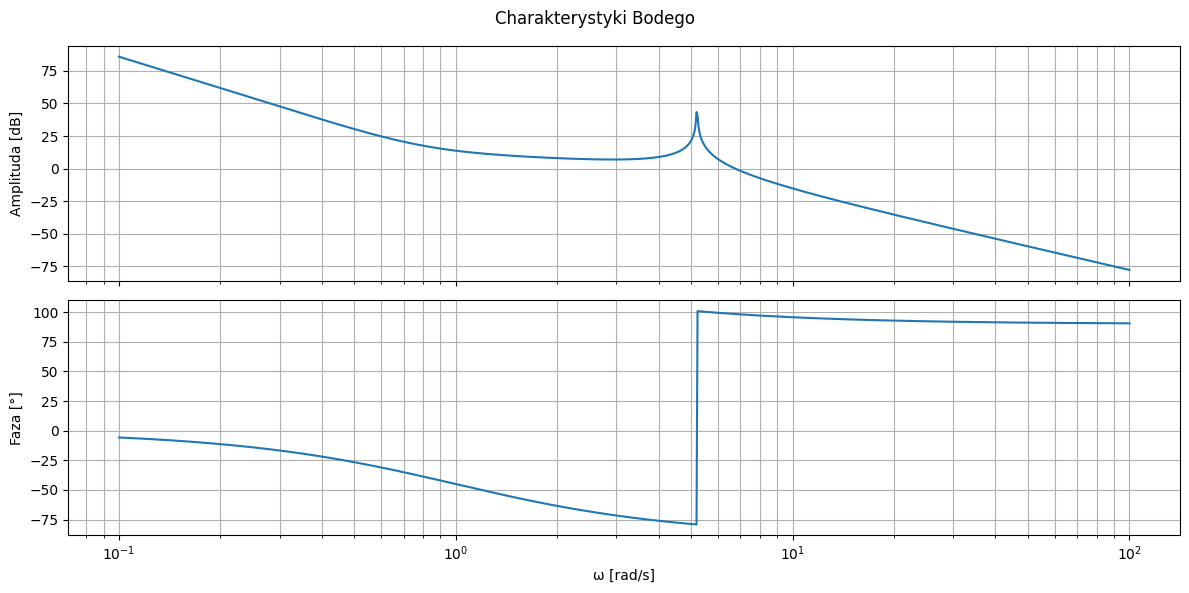

In [19]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 6), sharex=True)

# amplituda (w dB)
ax1.semilogx(w, 20*np.log10(amplitude))
ax1.set_ylabel("Amplituda [dB]")
ax1.grid(which="both")

# faza (w stopniach)
ax2.semilogx(w, phase)
ax2.set_xlabel("ω [rad/s]")
ax2.set_ylabel("Faza [°]")
ax2.grid(which="both")

fig.suptitle("Charakterystyki Bodego")

plt.tight_layout() # ładniej wygląda wykres

---

In [21]:
y_t = y_t.subs({A: 24.3, w0: 5.2})
y_t

t**3/3 - t**2 + 2*t + 0.866619115549215*sin(5.2*t) - 4.50641940085592*cos(5.2*t) - 2 + 6.50641940085592*exp(-t)

In [22]:
y_t_fun = sp.lambdify(t, y_t, modules='numpy')

time = np.linspace(0,100,1000)
y = y_t_fun(time)

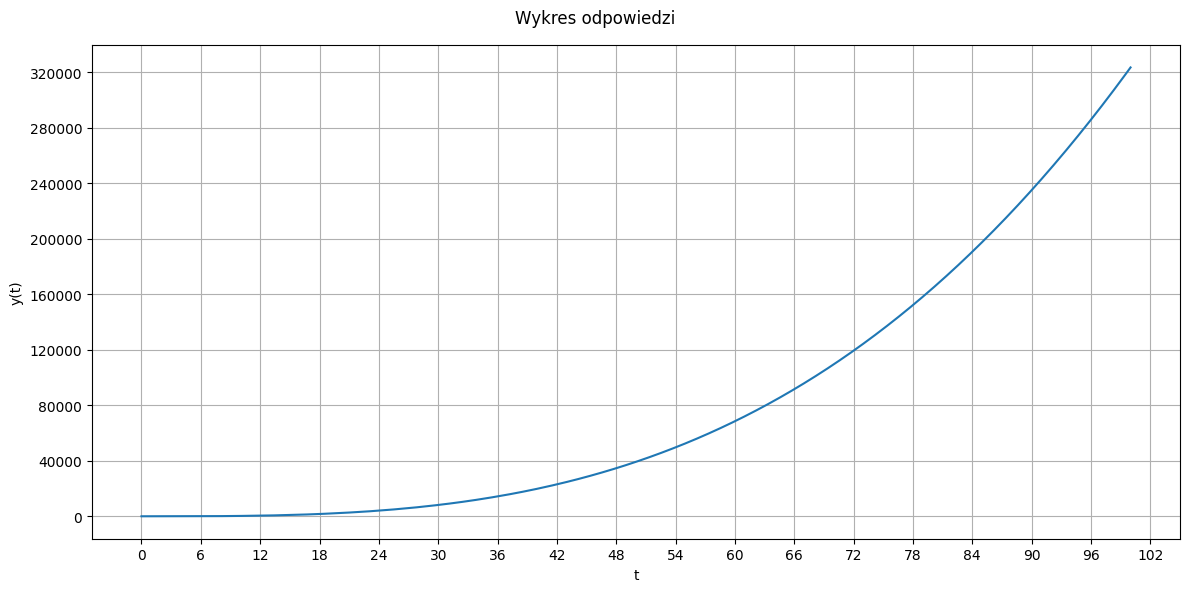

In [23]:
from matplotlib import ticker

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))

ax.plot(time, y)
ax.set_xlabel("t")
ax.set_ylabel("y(t)")

# Siatka
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=20))  # ok. 10 ticków w poziomie
ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=10))  # ok. 8 ticków w pionie
ax.grid()

fig.suptitle("Wykres odpowiedzi")

plt.tight_layout() # ładniej wygląda wykres